<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
# ホールドアウトセット
from sklearn.model_selection import train_test_split
# データを50%に分割
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# training
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X1, y1)

# evaluation
y2_model = model.predict(X2)
accuracy_score(y2_model, y2)

0.9066666666666666

In [9]:
# 交差検証 Cross Validation
# ホールドアウトセットでは学習に使えるモデルが減ってしまうため、これを解決する策としてCross Validationを用いる
from sklearn.model_selection import cross_val_score
# 5つのグループに分割
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [10]:
# leave-one-out交差検証
# 各試行で一つのデータを除いた残りで学習を行う
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
scores.mean()

0.96

In [12]:
# 検証曲線の作成
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [13]:
# 多項式を元にしたデータ作成
def make_data(N, err=1.0, rseed=1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  # ravel()は多次元リスト一次元にして返す
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y

X, y = make_data(40)

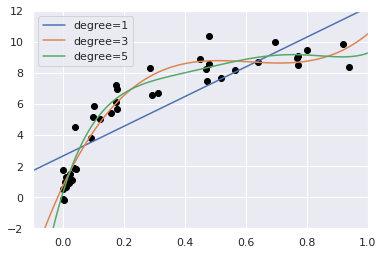

In [14]:
# データを可視化してみる
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
  # 回帰曲線を描画する
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='degree={}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

モデルの複雑さが多項式の次数によって決まることが分かる

Text(0, 0.5, 'score')

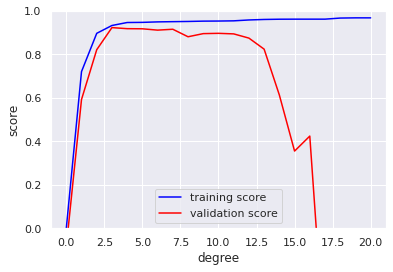

In [15]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

validation_scoreが最大となるdegree=3(3次多項式)が
バイアスとバリアンス間の最適なトレードオフ

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

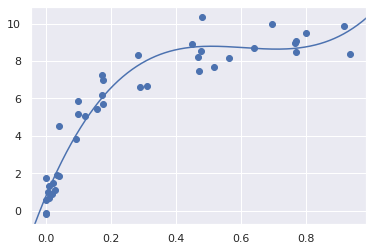

In [16]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

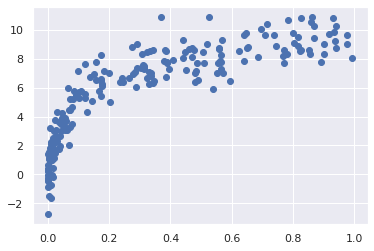

In [17]:
# より大きなデータセットは、より複雑なモデルをサポートする
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

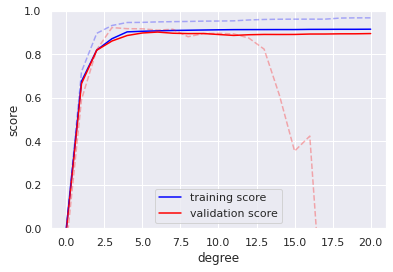

In [18]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

データセットを5倍にすると、20次の多項式でも過剰適合にはならない

=> 検証曲線はモデルの複雑さと学習データ量に依存する

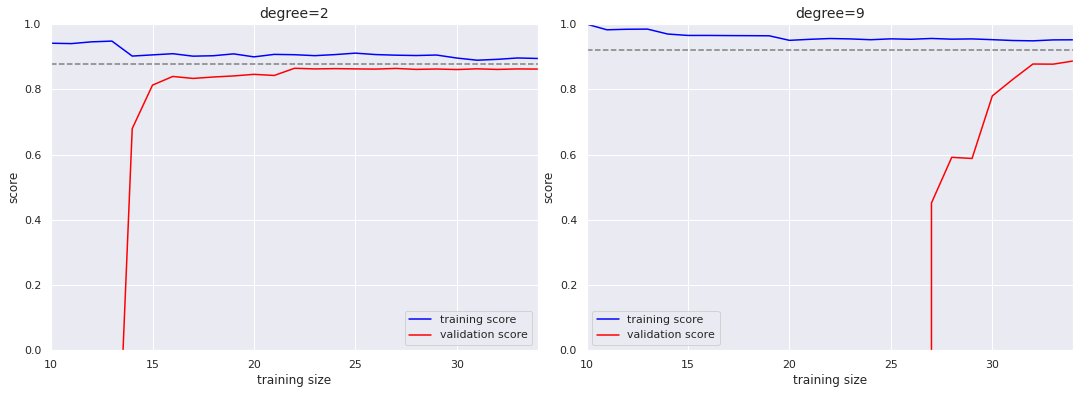

In [19]:
# 学習データ数の関数としてモデルの振舞を調べる
# 学習曲線を作成
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# 次数が2と9の場合で、学習曲線を描画する
for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7,
                                       train_sizes=np.linspace(0.3, 1, 25))
  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  # 最後の要素(training sizeが最大)のときの訓練スコアと検証スコアの中間値を点線で描画
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  ax[i].set_title('degree={}'.format(degree), size=14)
  ax[i].legend(loc='best')



*   学習曲線が既に収束している場合、学習データを増やしても適合度は向上しない
*   複雑なモデルに移行することで、収束するスコアは増加する



In [20]:
# グリッドサーチ
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]
              }
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [21]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [22]:
# グリッドサーチによって推定された最適パラメータ
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

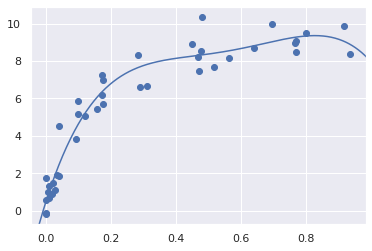

In [23]:
# 最良モデルを求める
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)